<a href="https://www.kaggle.com/code/yunasheng/boston-housing-linear-regression?scriptVersionId=185688257" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Overview

`CRIM`: Per capita crime rate by town. A higher value indicates a higher crime rate, suggesting the safety level of the area.

`ZN`: Proportion of residential land zoned for lots over 25,000 sq. ft. Areas with a high proportion may have larger, more luxurious homes.

`INDUS`: Proportion of non-retail business acres per town. A high proportion may indicate industrial or commercial areas.

`CHAS`: Charles River dummy variable (1 if the tract bounds the river, 0 otherwise). Proximity to the Charles River may increase property values.

`NOX`: Nitric oxides concentration (parts per 10 million). A high concentration indicates air pollution.

`RM`: Average number of rooms per dwelling. The number of rooms is an indicator of house size.

`AGE`: Proportion of owner-occupied units built prior to 1940. A high proportion indicates areas with older homes.

`DIS`: Weighted distances to five Boston employment centers. Proximity to employment centers may increase property values.

`RAD`: Index of accessibility to radial highways. Easy access to radial highways affects transportation and property value.

`TAX`: Full-value property tax rate per 10,000 dollar. The tax rate reflects local tax policy.

`PTRATIO`: Pupil-teacher ratio by town. A high ratio may indicate schools with high student density.

`B`: ( 1000(B_k - 0.63)^2 ) where ( B_k ) is the proportion of Black residents by town. This ratio reflects the racial composition of the population.

`LSTAT`: Percentage of the lower status of the population. A high percentage indicates areas with low income or poverty.

`MEDV`: Median value of owner-occupied homes in 1000s (this is the target variable). The value we aim to predict in analyses, providing an idea of house prices in the area.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/kaggle/input/house/train.csv')

In [3]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
train.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


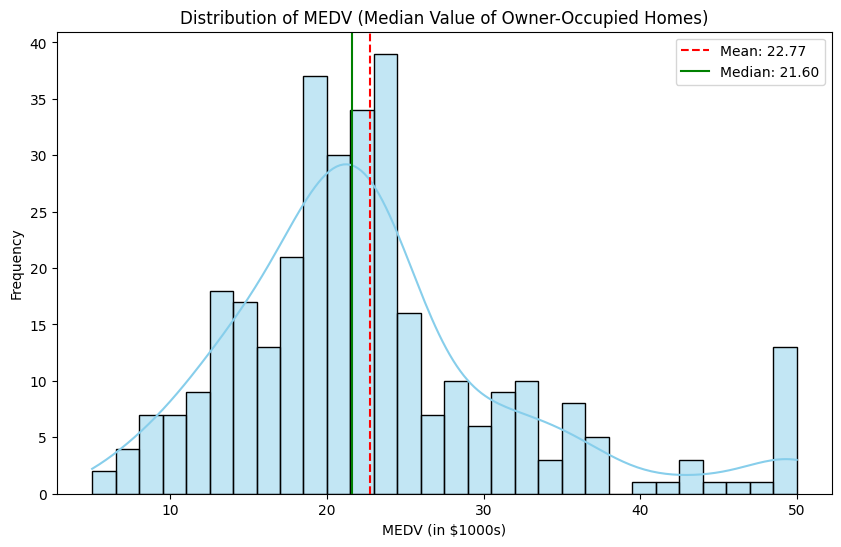

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(train.medv, kde=True, color='skyblue',bins=30)


plt.title('Distribution of MEDV (Median Value of Owner-Occupied Homes)')
plt.xlabel('MEDV (in $1000s)')
plt.ylabel('Frequency')

mean= train.medv.mean()
median = train.medv.median()
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', label=f'Median: {median:.2f}')

plt.legend()

plt.show()

In [7]:
corr = train.drop(columns='ID').corr()
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251
tax,0.617081,-0.311180,0.708313,-0.021826,0.670722,-0.356987,0.511893,-0.529539,0.903562,1.000000,0.467437,-0.406477,0.544485,-0.448078


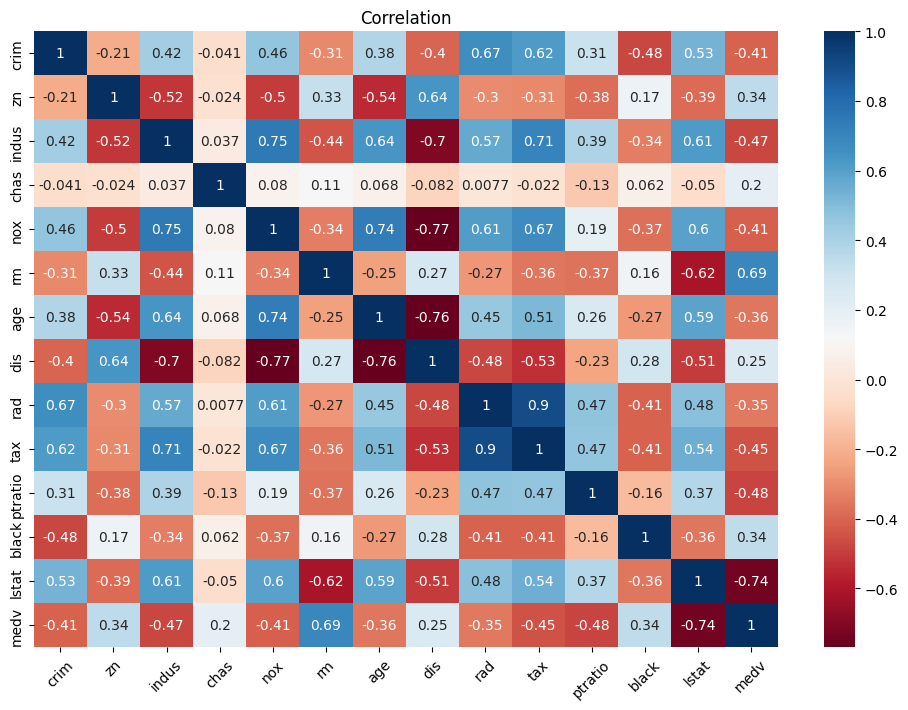

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True, cmap='RdBu')
plt.title('Correlation')
plt.xticks(rotation=45)
plt.show()

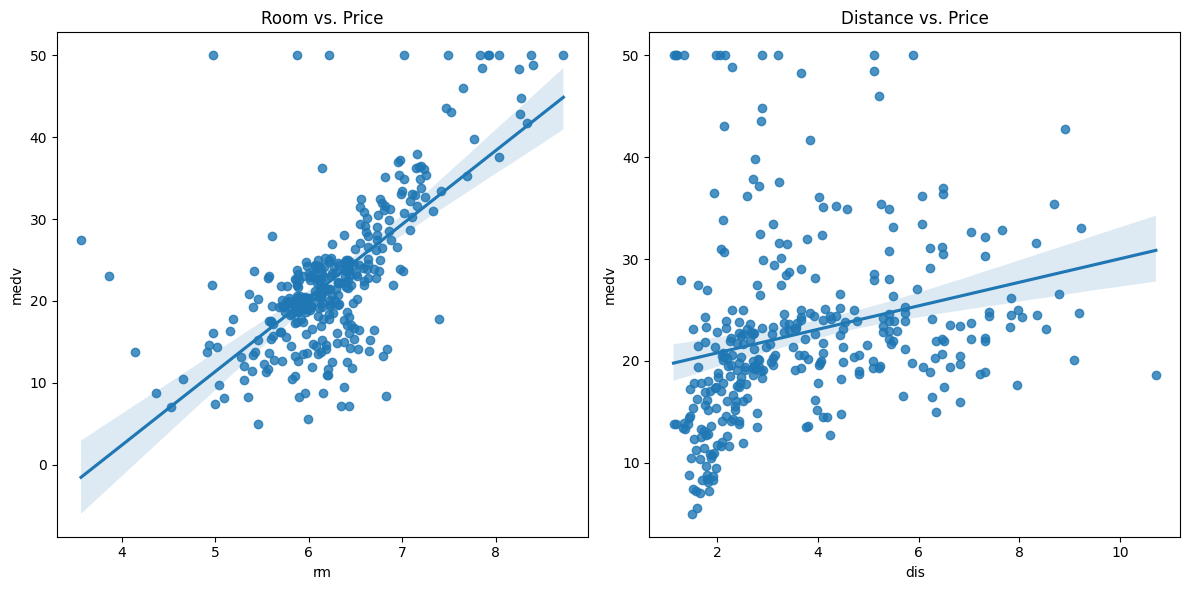

In [9]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

sns.regplot(x='rm', y='medv', data=train, ax=axes[0])
axes[0].set_title("Room vs. Price")

sns.regplot(x='dis', y='medv', data=train, ax=axes[1])
axes[1].set_title("Distance vs. Price")

plt.tight_layout()
plt.show()

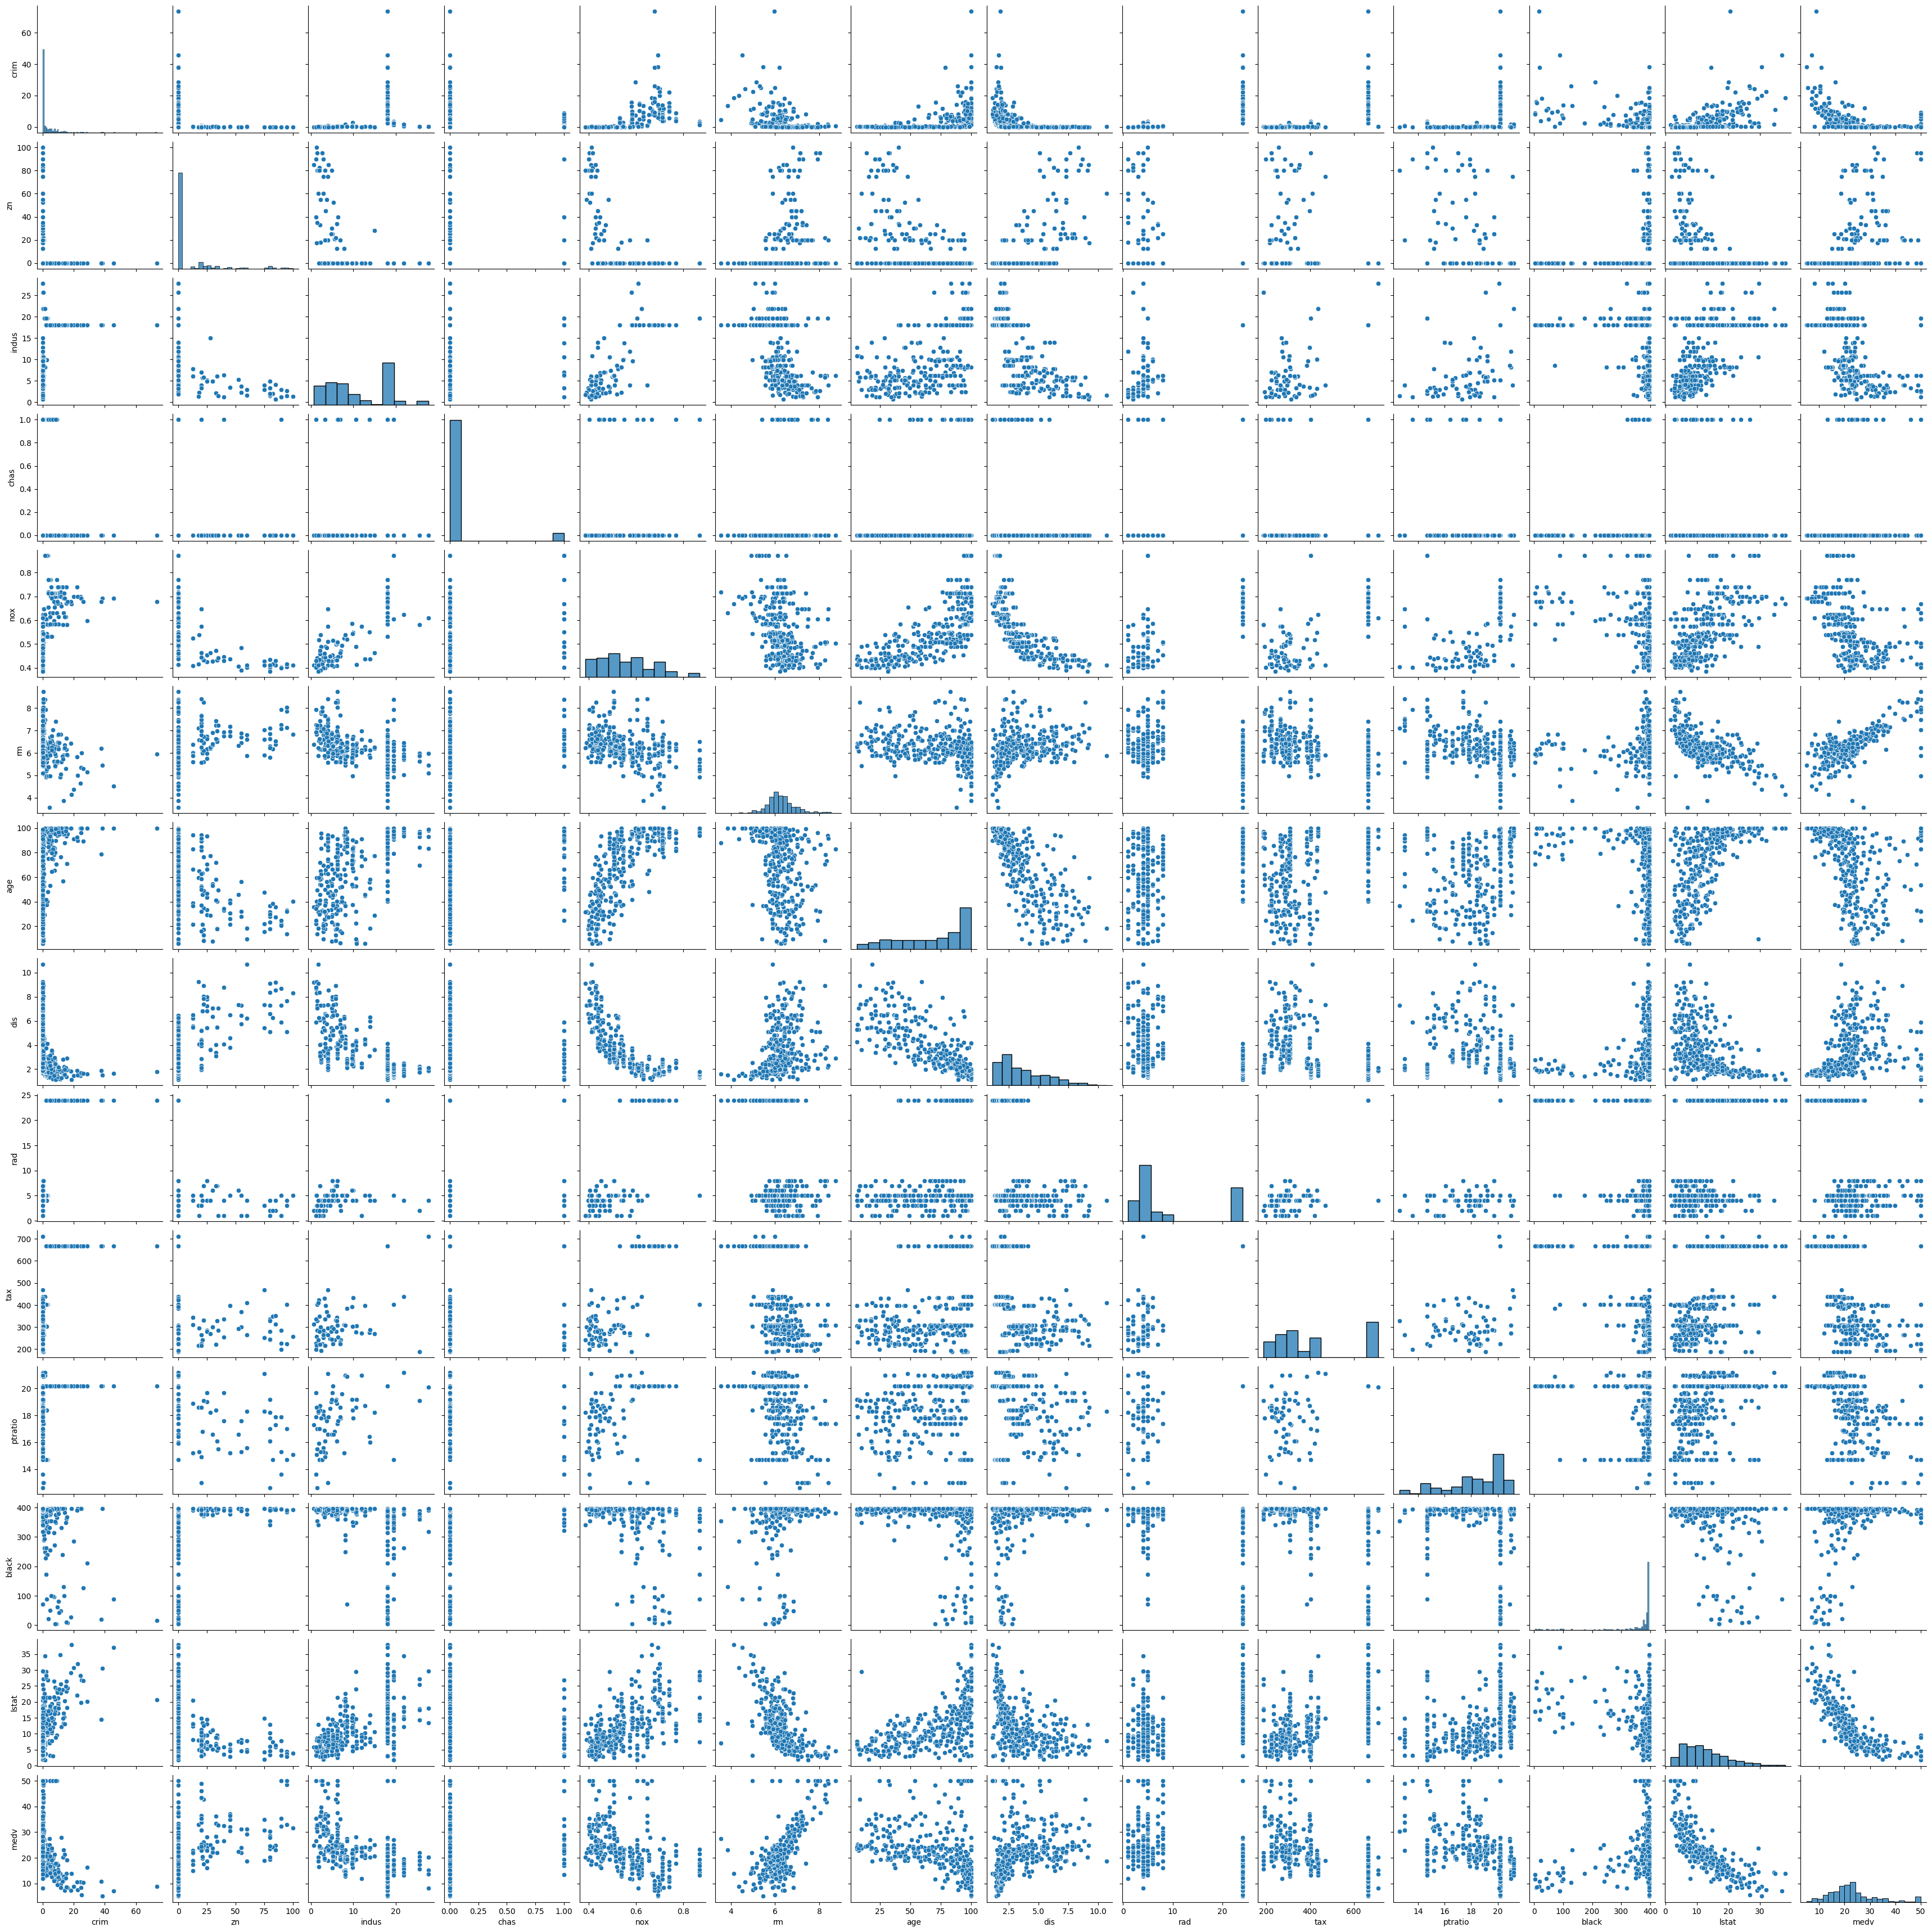

In [10]:
sns.pairplot(train.drop(columns='ID'))
plt.show()

In [11]:
x = train.drop(columns=['ID','medv'])
y = train['medv']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)

# 5. Regression model

5.1 Training model

In [13]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(x_test)

5.2 Evaluating model

In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', np.sqrt(mse))

MAE:  3.6119792299449167
MSE:  33.70103868069505
RMSE:  5.805259570483911


# Credit:

https://www.kaggle.com/code/abdelrahmanmohamed26/boston-housing-linear-regression/notebook